In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [12]:
#df = pd.read_csv("C:\Users\breno\GitHub\PI\codigos_python/datasus.csv")

#df = pd.read_csv("datasus.csv")
#C:\Users\breno\anaconda3\envs\envpowerbi\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (4,30,31,32,42,43,52,59,60,78,79,81,82,83,85,89,91,93) have mixed types.Specify dtype option on import or set low_memory=False.
#  interactivity=interactivity, compiler=compiler, result=result)

df = pd.read_csv("../extracao_datasus/datasus.csv", low_memory=False)

In [13]:
# Carregando os dados
data = pd.read_csv("../extracao_datasus/datasus.csv", low_memory=False)

# Visualizando as primeiras linhas do DataFrame
print(data.head())

   CONTADOR  ORIGEM   TIPOBITO     DTOBITO HORAOBITO NATURAL      DTNASC  \
0         1       1  Não Fetal  2010-07-22      0700     NaN  1933-01-18   
1         2       1  Não Fetal  2010-08-30      0700     NaN  1945-11-05   
2         3       1  Não Fetal  2010-09-25      1700     NaN  1938-05-26   
3         4       1  Não Fetal  2010-01-29      0740     NaN  1966-03-04   
4         5       1  Não Fetal  2010-07-01      1600     NaN  1927-11-04   

        SEXO  RACACOR    ESTCIV  ... TPRESGINFO TPNIVELINV  NUDIASINF  \
0  Masculino   Branca    Casado  ...        NaN        NaN        NaN   
1   Feminino    Preta  Solteiro  ...        NaN        NaN        NaN   
2  Masculino  Amarela    Casado  ...        NaN        NaN        NaN   
3  Masculino      NaN  Solteiro  ...        NaN        NaN        NaN   
4  Masculino   Branca     Viúvo  ...        NaN        NaN        NaN   

   FONTESINF ALTCAUSA  IDADEminutos  IDADEhoras  IDADEdias  IDADEmeses  \
0        NaN      NaN         

In [14]:
# Configurações para visualização
sns.set(style="whitegrid")

In [15]:
# Configurar o Pandas para exibir todas as colunas
pd.set_option('display.max_columns', None)

# Imprimir a contagem de valores nulos para todas as colunas
print(data.isnull().sum())

CONTADOR              0
ORIGEM                0
TIPOBITO              0
DTOBITO               0
HORAOBITO        193434
                 ...   
IDADEminutos    3977796
IDADEhoras      3970398
IDADEdias       3940634
IDADEmeses      3957382
IDADEanos         94396
Length: 100, dtype: int64


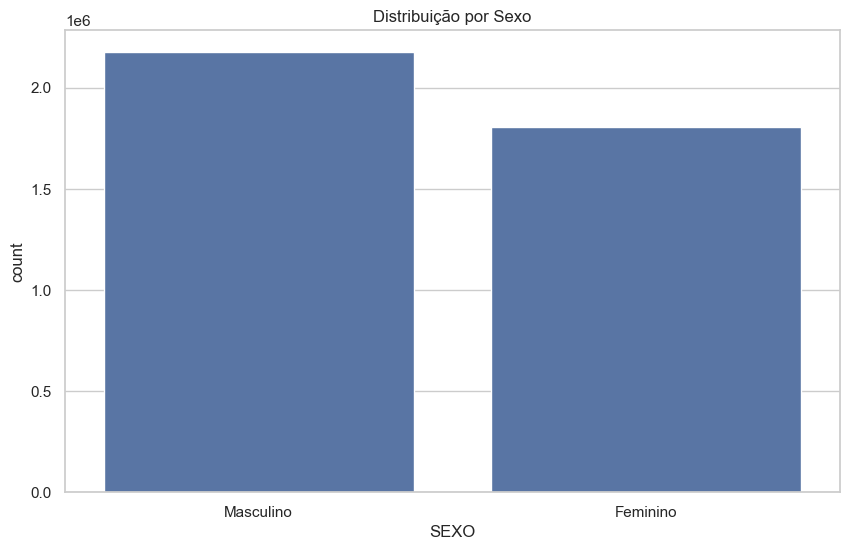

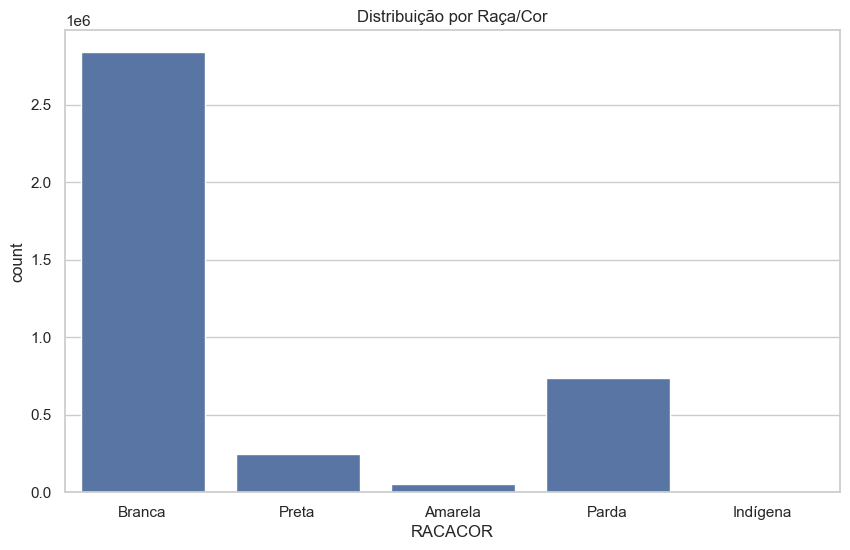

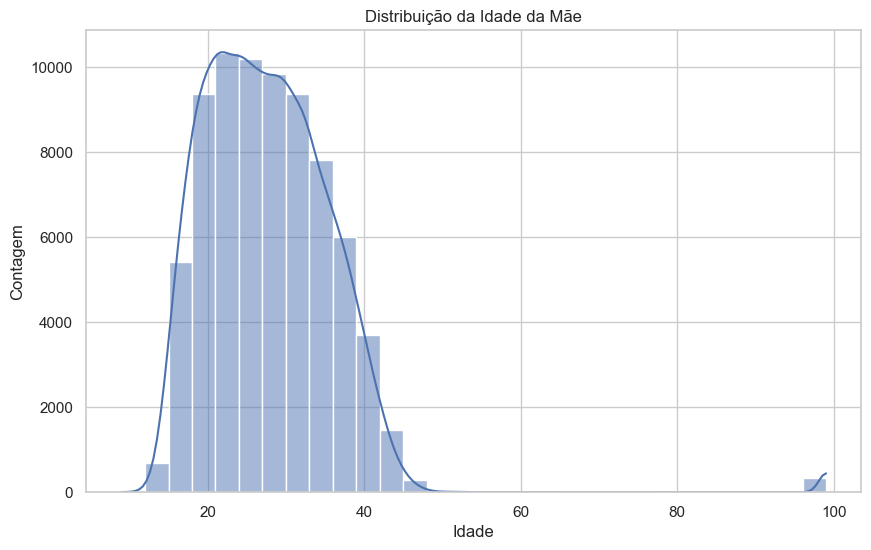

In [16]:
# Verificando a distribuição de algumas variáveis categóricas
plt.figure(figsize=(10, 6))
sns.countplot(x='SEXO', data=data)
plt.title('Distribuição por Sexo')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='RACACOR', data=data)
plt.title('Distribuição por Raça/Cor')
plt.show()

# Explorando um pouco mais a idade dos indivíduos
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='IDADEMAE', bins=30, kde=True)
plt.title('Distribuição da Idade da Mãe')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.show()

In [17]:
# Verificando informações sobre os dados
print(data.info())

# Verificando valores ausentes
print(data.isnull().sum())

# Lidando com valores ausentes (preenchendo ou removendo)

# Removendo colunas irrelevantes
data = data.drop(columns=['CONTADOR', 'ORIGEM', 'DTOBITO', 'HORAOBITO', 'NATURAL', 'LOCOCOR', 'CODESTAB', 'CODMUNOCOR', 'CODBAIOCOR', 'ESCMAE', 'OCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'GRAVIDEZ', 'GESTACAO', 'PARTO', 'OBITOPARTO', 'PESO', 'OBITOGRAV', 'OBITOPUERP', 'ASSISTMED', 'EXAME', 'CIRURGIA', 'NECROPSIA', 'LINHAA', 'LINHAB', 'LINHAC', 'LINHAD', 'LINHAII', 'DTATESTADO', 'CIRCOBITO', 'ACIDTRAB', 'FONTE', 'TPPOS', 'DTINVESTIG', 'CAUSABAS_O', 'DTCADASTRO', 'ATESTANTE', 'FONTEINV', 'DTRECEBIM', 'UFINFORM', 'CB_PRE', 'MORTEPARTO', 'DTCADINF', 'TPOBITOCOR', 'DTCADINV', 'COMUNSVOIM', 'DTRECORIG', 'DTRECORIGA', 'CAUSAMAT', 'ESC2010', 'ESCMAE2010', 'STDOEPIDEM', 'STDONOVA', 'SEMAGESTAC', 'TPMORTEOCO', 'DIFDATA', 'DTCONCASO', 'NUDIASOBIN', 'SERIESCFAL', 'SERIESCMAE', 'CODMUNCART', 'CODCART', 'NUMREGCART', 'DTREGCART', 'DTCONINV', 'CODMUNNATU', 'ESTABDESCR', 'CRM', 'NUMEROLOTE', 'STCODIFICA', 'CODIFICADO', 'VERSAOSIST', 'VERSAOSCB', 'ATESTADO', 'ESCMAEAGR1', 'ESCFALAGR1', 'NUDIASOBCO', 'FONTES', 'TPRESGINFO', 'TPNIVELINV', 'NUDIASINF', 'FONTESINF', 'ALTCAUSA', 'IDADEminutos', 'IDADEhoras', 'IDADEdias', 'IDADEmeses', 'IDADEanos'])

# Convertendo a coluna 'DTOBITO' para datetime
data['DTOBITO'] = pd.to_datetime(data['DTOBITO'])

# Convertendo a coluna 'SEXO' para valores numéricos (0 para Feminino e 1 para Masculino)
data['SEXO'] = data['SEXO'].apply(lambda x: 0 if x == 'Feminino' else 1)

# Convertendo a coluna 'RACACOR' para valores numéricos usando LabelEncoder
label_encoder = LabelEncoder()
data['RACACOR'] = label_encoder.fit_transform(data['RACACOR'])

# Convertendo a coluna 'ESTCIV' para valores numéricos usando LabelEncoder
data['ESTCIV'] = label_encoder.fit_transform(data['ESTCIV'].astype(str))

# Convertendo a coluna 'ESC' para valores numéricos usando LabelEncoder
data['ESC'] = label_encoder.fit_transform(data['ESC'].astype(str))

# Convertendo a coluna 'OCUP' para valores numéricos usando LabelEncoder
data['OCUP'] = label_encoder.fit_transform(data['OCUP'].astype(str))

# Convertendo a coluna 'CODMUNRES' para valores numéricos usando LabelEncoder
data['CODMUNRES'] = label_encoder.fit_transform(data['CODMUNRES'])

# Convertendo a coluna 'CODBAIRES' para valores numéricos usando LabelEncoder
data['CODBAIRES'] = label_encoder.fit_transform(data['CODBAIRES'])

# Visualizando as primeiras linhas após a limpeza e pré-processamento
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3982921 entries, 0 to 3982920
Data columns (total 100 columns):
 #   Column        Dtype  
---  ------        -----  
 0   CONTADOR      int64  
 1   ORIGEM        int64  
 2   TIPOBITO      object 
 3   DTOBITO       object 
 4   HORAOBITO     object 
 5   NATURAL       object 
 6   DTNASC        object 
 7   SEXO          object 
 8   RACACOR       object 
 9   ESTCIV        object 
 10  ESC           object 
 11  OCUP          object 
 12  CODMUNRES     int64  
 13  CODBAIRES     float64
 14  LOCOCOR       object 
 15  CODESTAB      float64
 16  CODMUNOCOR    int64  
 17  CODBAIOCOR    float64
 18  IDADEMAE      float64
 19  ESCMAE        object 
 20  OCUPMAE       object 
 21  QTDFILVIVO    float64
 22  QTDFILMORT    float64
 23  GRAVIDEZ      object 
 24  GESTACAO      object 
 25  PARTO         object 
 26  OBITOPARTO    object 
 27  PESO          float64
 28  OBITOGRAV     object 
 29  OBITOPUERP    object 
 30  ASSISTMED     obj

KeyError: 'DTOBITO'

In [18]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3982921 entries, 0 to 3982920
Data columns (total 100 columns):
 #   Column        Dtype  
---  ------        -----  
 0   CONTADOR      int64  
 1   ORIGEM        int64  
 2   TIPOBITO      object 
 3   DTOBITO       object 
 4   HORAOBITO     object 
 5   NATURAL       object 
 6   DTNASC        object 
 7   SEXO          object 
 8   RACACOR       object 
 9   ESTCIV        object 
 10  ESC           object 
 11  OCUP          object 
 12  CODMUNRES     int64  
 13  CODBAIRES     float64
 14  LOCOCOR       object 
 15  CODESTAB      float64
 16  CODMUNOCOR    int64  
 17  CODBAIOCOR    float64
 18  IDADEMAE      float64
 19  ESCMAE        object 
 20  OCUPMAE       object 
 21  QTDFILVIVO    float64
 22  QTDFILMORT    float64
 23  GRAVIDEZ      object 
 24  GESTACAO      object 
 25  PARTO         object 
 26  OBITOPARTO    object 
 27  PESO          float64
 28  OBITOGRAV     object 
 29  OBITOPUERP    object 
 30  ASSISTMED     obj

,CONTADOR,ORIGEM,CODMUNRES,CODBAIRES,CODESTAB,CODMUNOCOR,CODBAIOCOR,IDADEMAE,QTDFILVIVO,QTDFILMORT,PESO,UFINFORM,MORTEPARTO,DTCADINF,TPOBITOCOR,DTCADINV,COMUNSVOIM,DTRECORIG,ESC2010,ESCMAE2010,STDOEPIDEM,STDONOVA,SEMAGESTAC,TPMORTEOCO,DIFDATA,DTCONCASO,NUDIASOBIN,SERIESCFAL,SERIESCMAE,CODMUNCART,CODCART,NUMREGCART,DTREGCART,DTCONINV,CODMUNNATU,NUMEROLOTE,VERSAOSCB,ESCMAEAGR1,ESCFALAGR1,NUDIASOBCO,TPRESGINFO,NUDIASINF,ALTCAUSA,IDADEminutos,IDADEhoras,IDADEdias,IDADEmeses,IDADEanos
count,3.982921e+06,3.982921e+06,3.982921e+06,1.625780e+05,3.178489e+06,3.982921e+06,3.027300e+04,74904.00000,74280.000000,71930.000000,74903.000000,0.0,64250.000000,6.456100e+04,167639.000000,1.624290e+05,751358.000000,5.451260e+05,3.137028e+06,64207.000000,3712159.0,3.717390e+06,62313.000000,232591.000000,3.447023e+06,3.593800e+04,60309.000000,812323.000000,28424.000000,62946.000000,55401.000000,4.736100e+04,4.744300e+04,1.257450e+05,2.729915e+06,2.897549e+06,2.879442e+06,49675.000000,2.697198e+06,113573.000000,4552.000000,5538.000000,42496.000000,5125.000000,12523.000000,42287.000000,25539.000000,3.888525e+06
mean,4.239461e+05,1.003886e+00,3.534946e+05,9.822008e+03,2.854669e+06,3.535833e+05,4.180436e+03,27.65074,3.167919,3.009885,1699.306223,NaN,3.210117,1.591234e+07,8.815401,1.620211e+07,353815.581285,1.766112e+07,2.736917e+00,3.352843,0.0,8.876359e-01,32.217627,8.038738,7.188637e+01,1.557745e+07,130.224096,4.362435,3.927948,353453.305834,4154.795040,1.728869e+05,1.558168e+07,1.441808e+07,3.361369e+05,2.018510e+07,3.250154e+00,7.367167,7.036598e+00,87.219295,1.260545,129.631455,1.819889,24.726049,6.314861,7.757467,3.686166,6.791930e+01
std,4.405526e+05,8.689333e-02,1.711635e+03,6.947439e+05,1.760583e+06,5.921780e+03,2.306219e+05,8.69551,13.365796,16.053450,1066.184933,NaN,1.141020,8.726980e+06,0.910886,8.737406e+06,8817.265317,8.419089e+06,2.769988e+00,1.849757,0.0,3.158139e-01,12.291798,0.863456,1.261765e+02,8.603115e+06,106.404273,1.835296,2.174498,5440.394922,2690.469037,2.506984e+06,8.699997e+06,9.506892e+06,4.119683e+04,2.642495e+04,9.588371e-02,3.066555,4.083052e+00,83.450322,0.566204,106.205131,0.384284,16.888828,6.076559,7.491815,2.896332,1.846788e+01
min,1.000000e+00,1.000000e+00,3.500000e+05,1.000000e+00,2.100000e+01,1.100020e+05,1.000000e+00,9.00000,0.000000,0.000000,1.000000,NaN,1.000000,1.012011e+06,1.000000,1.012011e+06,110002.000000,1.022011e+06,0.000000e+00,0.000000,0.0,0.000000e+00,0.000000,1.000000,0.000000e+00,1.012021e+06,1.000000,1.000000,1.000000,210720.000000,1.000000,0.000000e+00,1.012013e+06,1.012014e+06,1.100000e+05,2.014000e+07,2.200000e+00,0.000000,0.000000e+00,0.000000,1.000000,8.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000e+00
25%,1.101100e+05,1.000000e+00,3.518800e+05,1.900000e+01,2.078503e+06,3.519700e+05,1.600000e+01,21.00000,0.000000,0.000000,745.000000,NaN,3.000000,8.112012e+06,9.000000,8.122017e+06,352530.000000,1.112201e+07,1.000000e+00,2.000000,0.0,1.000000e+00,26.000000,8.000000,1.400000e+01,8.092020e+06,60.000000,3.000000,3.000000,351880.000000,2001.000000,1.099400e+04,8.052013e+06,6.022014e+06,3.147600e+05,2.016003e+07,3.200000e+00,6.000000,2.000000e+00,35.000000,1.000000,61.000000,2.000000,10.000000,1.000000,2.000000,1.000000,5.700000e+01
50%,2.194430e+05,1.000000e+00,3.541400e+05,4.600000e+01,2.082829e+06,3.543400e+05,4.300000e+01,27.00000,1.000000,0.000000,1385.000000,NaN,3.000000,1.606202e+07,9.000000,1.611202e+07,354850.000000,1.607201e+07,2.000000e+00,3.000000,0.0,1.000000e+00,31.000000,8.000000,2.800000e+01,1.509201e+07,105.000000,4.000000,3.000000,353440.000000,4616.000000,3.153900e+04,1.510201e+07,1.409202e+07,3.522700e+05,2.019001e+07,3.200000e+00,6.000000,9.000000e+00,70.000000,1.000000,101.000000,2.000000,24.000000,4.000000,5.000000,3.000000,7.100000e+01
75%,6.723150e+05,1.000000e+00,3.550300e+05,9.300000e+01,2.786435e+06,3.550300e+05,8.900000e+01,33.00000,2.000000,1.000000,2625.000000,NaN,3.000000,2.310201e+07,9.000000,2.403202e+07,355030.000000,2.611201e+07,3.000000e+00,3.000000

In [19]:
df.isnull().sum()
df.duplicated().sum()
for col in df.columns:
    if df[col].dtype == 'object':
        print(df[col].unique())

['Não Fetal']
['2010-07-22' '2010-08-30' '2010-09-25' ... '2022-11-26' '2022-07-28'
 '2022-07-18']
['0700' '1700' '0740' ... '21;00' '05000' '08000']
[nan 'N INFORMADO' 'MALASIA' 'MARROCOS' 'ARMENIA' 'SEYCHELES' 'MADAGASCAR'
 'LAOS' 'VIETNA' 'RIO GRANDE DO NORTE' 'SENEGAL' 'TAIWAN (FORMOSA)'
 'PIAUI' 'TADJIQUISTAO' 'COOK, ILHAS' 'BUTAO' 'SAMOA AMERICANA, ILHAS'
 'GROENLANDIA' 'ANDORRA' 'HONG KONG' 'EGITO' 'MAURITANIA' 'LIBERIA'
 'KIRIBATI' 'FALKLAND, ILHAS  (EX-MALVINAS)' 'TANZANIA' 'COMORES, ILHA'
 'BRUNEI' 'ILHAS MARSHALL' 'GABAO' 'FRANCA' 'ANTIGUA E BARBUDA' 'CONGO'
 'SAN MARINO' 'JAMAICA' 'GANA' 'GUINE EQUATORIAL' 'TONGA' 'BAHREIN'
 'LIBIA' 'BURUNDI' 'LIBANO' 'BENIN' 'ANGUILLA' 'DJIBUTI' 'AFEGANISTAO'
 'CANADA' 'TOCANTINS' 'FINLANDIA' 'AZERBAIDJAO' 'AMAPA' 'ESPANHA'
 'GRANADA' 'SAMOA' 'MALDIVAS' 'ALEMANHA OC' 'GEORGIA'
 'ANTILHAS HOLANDESAS' 'LETONIA' 'REPUBLICA DOMINICANA' 'TOGO' 'ISLANDIA'
 'GRECIA' 'SAO TOME E PRINCIPE' 'SERRA LEOA' 'PAPUA NOVA GUINE'
 'ILHAS SALOMAO' 'GUIANA' '

In [21]:
df = df.dropna(subset=['coluna_com_muitas_nans'])
df['coluna_com_erros'] = df['coluna_com_erros'].replace('valor_invalido', np.nan)
df = df.fillna(method='ffill')
df = df.drop_duplicates()

KeyError: ['coluna_com_muitas_nans']

In [22]:
import pandas as pd

# Listar as colunas que contêm a palavra "IDADE"
colunas_idade = data.filter(like='IDADE').columns

# Imprimir os nomes das colunas que contêm a palavra "IDADE"
print(colunas_idade)

Index(['IDADEMAE'], dtype='object')


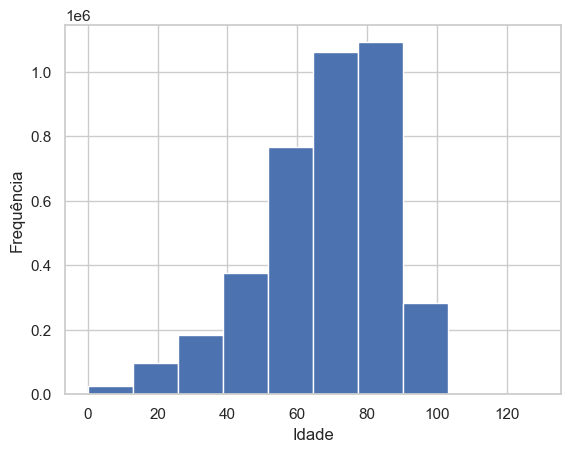

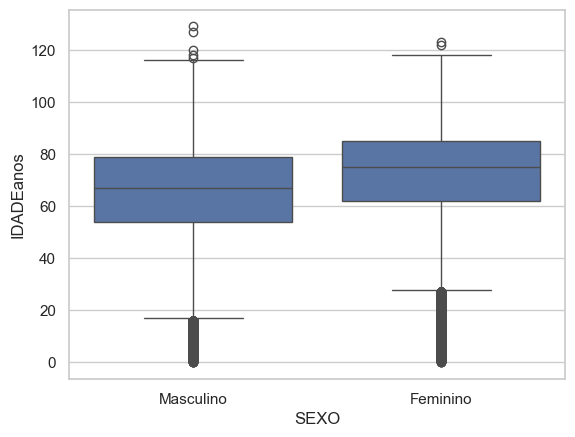

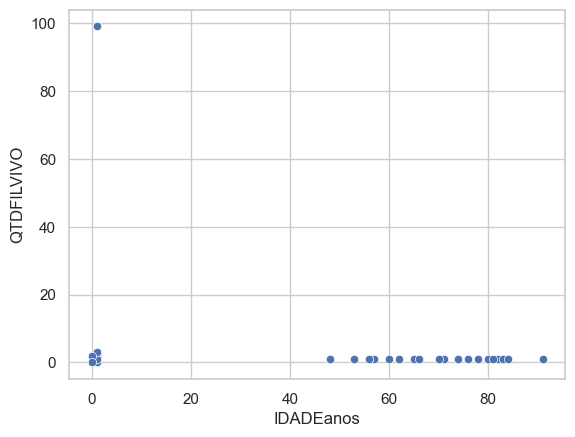

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criando um histograma para a variável 'IDADE'
plt.hist(df['IDADEanos'])
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

# Criando um boxplot para comparar a variável 'IDADE' entre os sexos
sns.boxplot(x='SEXO', y='IDADEanos', data=df)
plt.show()

# Criando um scatter plot para visualizar a relação entre 'IDADE' e 'QTDFILVIVO'
sns.scatterplot(x='IDADEanos', y='QTDFILVIVO', data=df)
plt.show()